It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.

You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file.


**Will you become Earth’s savior?
Or will you obliterate life?**

*The choice is yours...*

### **Cargamos y vemos los datos**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Valhalla23.csv')

print(data.head())
print("")
print(data.isnull().sum())

   Celsius    Valks
0  61.4720 -139.740
1  70.5790 -156.600
2  -7.3013   73.269
3  71.3380 -165.420
4  43.2360  -75.835

Celsius    0
Valks      0
dtype: int64


### **En el siguiente recuadro, se creó un gráfico de dispersión de Celsius vs Valks**

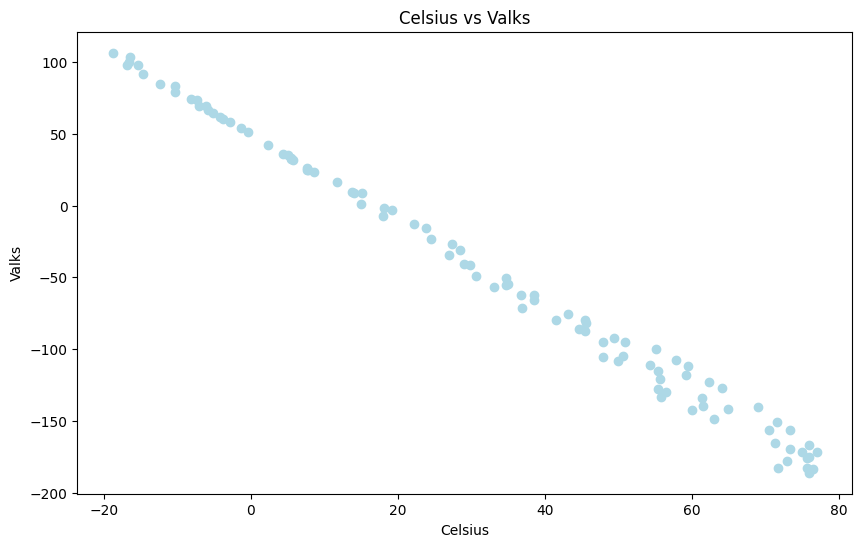

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Celsius'], data['Valks'], color='lightblue')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Celsius vs Valks')
plt.show()

# **Inicio de Modelo**

# Seleccion de valores y su criterio

## Tasa de aprendizaje (alpha):
- **Criterio:** Se utiliza validación cruzada (K-Fold) para seleccionar la mejor tasa de aprendizaje.
- Se prueba un rango amplio de valores: `alphas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]`
- La función `find_optimal_alpha` elige el alpha que produce el menor costo promedio en los pliegues de validación.

## Parámetros iniciales (theta):
- **Criterio:** Inicialización informada basada en estadísticas de los datos (principios estadísticos).
- El sesgo (`theta[0]`) se inicializa con la media de `y_train`.
Inicializar el sesgo con la media de y_train es una estimación razonable del "punto medio" de los datos en el eje y.
Esta inicialización ayuda a que el modelo comience con una predicción que está cerca del centro de los datos objetivo, lo que puede acelerar la convergencia.
- El peso (`theta[1]`) se inicializa con la covarianza entre `X` e `y` dividida por la varianza de `X`.
Esta fórmula es la solución analítica para la pendiente en una regresión lineal simple, conocida como el estimador de mínimos cuadrados ordinarios (OLS).

## Número de iteraciones:
- Se tiene un máximo de 10,000 iteraciones y un criterio de convergencia.
- La función `gradient_descent` detiene el entrenamiento si el cambio en el costo entre iteraciones es menor que un umbral (`tolerance=1e-6`).

## División de datos:
- Se implementa manualmente una función train_test_split para dividir los datos.
- Se mantiene la proporción 80% entrenamiento, 20% prueba.
- Se implementa manualmente una validación cruzada (5-fold) para la selección de hiperparámetros mediante la función k_fold_split.

## Criterio de convergencia:
- Se añade un criterio de parada basado en la diferencia de costo entre iteraciones.
- Si la diferencia es menor que `tolerance (1e-6)`, el algoritmo se detiene.

## Inicialización de la semilla aleatoria:
- Se utiliza `np.random.seed(42)` para reproducibilidad.

---

Estas mejoras hacen que el modelo sea más robusto y adaptable a diferentes conjuntos de datos. La selección de hiperparámetros es más sistemática y se basa en el rendimiento real del modelo en datos de validación, lo que debería resultar en un mejor rendimiento general y una mayor capacidad de generalización.


/var/folders/8m/t5mhmhhj2tqdfghm0yppdj0c0000gn/T/ipykernel_67713/3537719918.py:42: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((predictions - y)**2)
/var/folders/8m/t5mhmhhj2tqdfghm0yppdj0c0000gn/T/ipykernel_67713/3537719918.py:59: RuntimeWarning: invalid value encountered in scalar subtract
  if it > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
/var/folders/8m/t5mhmhhj2tqdfghm0yppdj0c0000gn/T/ipykernel_67713/3537719918.py:53: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (1/m) * alpha * (X.T.dot((prediction - y)))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Tasa de aprendizaje óptima: 0.0001
Theta final: [-22.12014674  -1.75244244]
Costo final (entrenamiento): 1028.5483709805605
Costo final (prueba): 1759.4112119922524


/var/folders/8m/t5mhmhhj2tqdfghm0yppdj0c0000gn/T/ipykernel_67713/3537719918.py:148: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, color='purple')


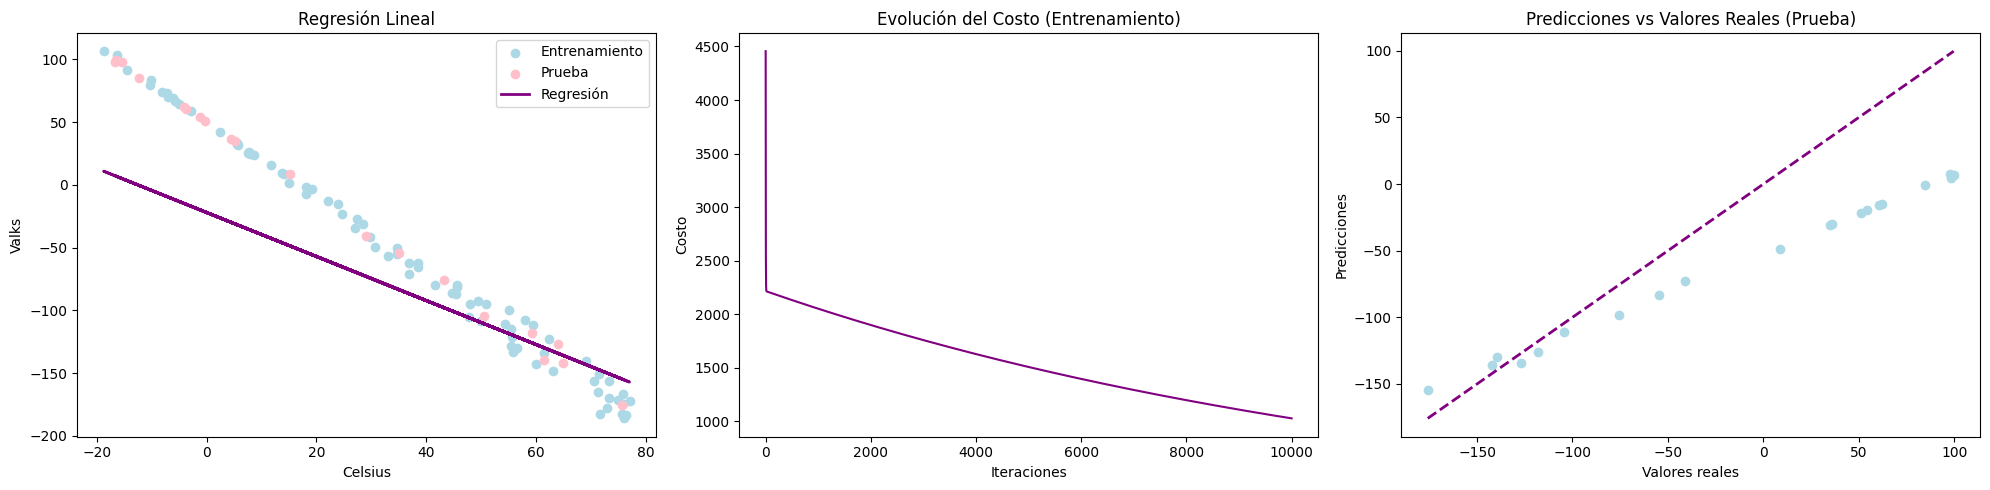

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Suponemos que 'data' ya está definido
X = data['Celsius'].values.reshape(-1, 1)
y = data['Valks'].values.reshape(-1, 1)

# Función para dividir los datos en conjuntos de entrenamiento y prueba
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n = len(X)
    n_test = int(n * test_size)
    indices = np.random.permutation(n)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añadir una columna de unos para el término de sesgo
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_train_b = add_bias(X_train)
X_test_b = add_bias(X_test)

# Inicializar parámetros de manera informada
theta = np.zeros((2, 1))
theta[0] = np.mean(y_train)
theta[1] = np.cov(X_train.flatten(), y_train.flatten())[0, 1] / np.var(X_train)

# Función para calcular el costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Función para realizar el descenso del gradiente
def gradient_descent(X, y, theta, n_iterations, alpha, tolerance=1e-6):
    m = len(y)
    cost_history = []
    theta_history = []

    for it in range(n_iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * alpha * (X.T.dot((prediction - y)))
        theta_history.append(theta.copy())

        current_cost = compute_cost(X, y, theta)
        cost_history.append(current_cost)

        if it > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            print(f"Convergencia alcanzada en la iteración {it}")
            break

    return theta, cost_history, theta_history

# Implementación manual de K-Fold Cross Validation
def k_fold_split(X, y, n_splits):
    fold_size = len(X) // n_splits
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    for i in range(n_splits):
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else len(X)
        test_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        yield train_indices, test_indices

# Búsqueda de la tasa de aprendizaje óptima con validación cruzada
def find_optimal_alpha(X, y, alphas, n_iterations, k_folds=5):
    best_alpha = None
    best_score = float('inf')

    for alpha in alphas:
        scores = []
        for train_index, val_index in k_fold_split(X, y, k_folds):
            X_train_fold, X_val_fold = X[train_index], X[val_index]
            y_train_fold, y_val_fold = y[train_index], y[val_index]

            theta_init = np.zeros((2, 1))
            theta_init[0] = np.mean(y_train_fold)
            theta_init[1] = np.cov(X_train_fold.flatten(), y_train_fold.flatten())[0, 1] / np.var(X_train_fold)

            theta, _, _ = gradient_descent(add_bias(X_train_fold), y_train_fold, theta_init, n_iterations, alpha)
            val_cost = compute_cost(add_bias(X_val_fold), y_val_fold, theta)
            scores.append(val_cost)

        mean_score = np.mean(scores)
        if mean_score < best_score:
            best_score = mean_score
            best_alpha = alpha

    return best_alpha

# Definir un rango más amplio de tasas de aprendizaje para probar
alphas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
n_iterations = 10000

optimal_alpha = find_optimal_alpha(X_train, y_train, alphas, n_iterations)
print(f"Tasa de aprendizaje óptima: {optimal_alpha}")

# Ejecutar el descenso del gradiente con la tasa de aprendizaje óptima
theta, cost_history, theta_history = gradient_descent(X_train_b, y_train, theta, n_iterations, optimal_alpha)

# Predecir usando el conjunto de prueba
y_pred = X_test_b.dot(theta)

# Calcular el costo para el conjunto de prueba
test_cost = compute_cost(X_test_b, y_test, theta)

# Imprimir resultados
print(f"Theta final: {theta.ravel()}")
print(f"Costo final (entrenamiento): {cost_history[-1]}")
print(f"Costo final (prueba): {test_cost}")

# Graficar los resultados
plt.figure(figsize=(20, 5))

# Graficar los datos y la línea de regresión
plt.subplot(131)
plt.scatter(X_train, y_train, label='Entrenamiento', color='lightblue')
plt.scatter(X_test, y_test, label='Prueba', color='pink')
plt.plot(X, add_bias(X).dot(theta), color='purple', linewidth=2, label='Regresión')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Regresión Lineal')
plt.legend()

# Graficar la evolución del costo
plt.subplot(132)
plt.plot(range(len(cost_history)), cost_history, color='purple')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución del Costo (Entrenamiento)')

# Graficar predicciones vs valores reales
plt.subplot(133)
plt.scatter(y_test, y_pred, color='lightblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, color='purple')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Prueba)')

plt.tight_layout()
plt.show()
